# Introduction to remote sensing
> This tutorial introduces remote sensing and some of its underlying physical theory.

- toc: false 
- badges: true
- comments: true
- categories: [remote_sensing]

#### We often associate the term "Remote Sensing" to satellites but this field has a long history that first started in the XIX century when someone had the idea of taking photographs of the land from hot air balloons. The field took off as a discipline during the mid XX century with the development of the space technology. The first image taken by a satellite dates back from the 1960, when the US weather satellite TIROS I was able to capture and send to the ground images of the Earth's atmosphere.

#### Since then, remote sensing has greatly developed with an increasing number of satellites and types of sensors. Nowadays there are hundreds of satellites which send us a constant stream of information about our planet.

![](data/history.png "Credit: Albert van Dijk -- Australian National University")


#### Satellites can be classified by the orbits they describe around the Earth. The most common satellite orbits for environmental remote sensing satellites are geostationary and sun-synchronous polar orbits. Geostationary satellites orbit around us following the Earth's rotation, so they provide images for a fixed area, normally a half sphere. Polar orbiting satellites circulate our planet at lower altitudes scanning a small fraction of the Earth between the poles in each pass. The following figure shows the consecutive passes and area covered by a polar satellite. The orbit of this satellites is normally synchronised with the sun so they follow a trajectory that coincides with the solar noon -- this is referred as sun-synchronous orbit.

![](data/sun-synchronous.png "Credit: https://earthobservatory.nasa.gov/features/OrbitsCatalog")

#### Due to their increased spatial resolution compared to geostationary satellites, polar-orbiting satellites are often preferred for environmental applications and research. DEA provides a high quality collection of high resolution polar orbiting satellite data coming from two missions: Landsat and Sentinel.

#### Polar orbiting satellites have a limited field of view and are only able to scan a stripe (swath) of the Earth's surface in each pass.

![](data/Sentinel-2_H1.jpg "Credit: https://www.esa.int/Applications/Observing_the_Earth/Copernicus")

#### The human eye can only capture a limited proportion of the electromagnetic spectrum, which is referred as the visible spectrum. However, the sun emits radiation with a much broader spectrum than the visible light. Sensors in satellites are able to capture the proportion of the Sun's energy that gets reflected by the Earth at different frequencies. The Earth also emits radiation at lower frequencies than the Sun at what is called the thermal infrarred region. The following figure represents from top to bottom a) the energy spectrum emitted by the Sun and Earth's determined by the Plank's law. b) The absortion spectrum of the Earth's atmosphere which absorbs energy differently depending on the region of the spectrum. c) Representation of the electromagnetic spectrum and names for each region.

![](data/Spektrum_eng_700.png "Credit: https://seos-project.eu/remotesensing/remotesensing-c01-p01.html")


#### The sensors mounted in satellites can measure the energy from a limited number of regions in the spectrum. Multispectral sensors can measure reflected and radiated energy at several regions of the spectrum. The following figure represents the sensing 'windows' at which Sentinel 2 and Landsat 7/8 sensors can capture which are tipycally designed to coincide with the atmospheric absortion windows.

![](data/dmidS2LS7Comparison.png "Credit: https://www.usgs.gov/media/images/comparison-landsat-7-and-8-bands-sentinel-2")

#### The reason why we use multispectral images to study the Earth's surface is because different materials and processes reflect energy with a unique footprint that help us identify them. For example, two surfaces with very similar colour in the visible spectrum might reflect energy very differently at other regions of the spectrum, which help us to differentiate them using remote sensing images.

#### The following figure shows the spectral response of different types of land cover. The amount of energy reflected in the different bands is different for each type of surface and the shape of these curves can be used to identify and classify pixels from satellite images.

![](data/spectral_response.png "Credit: https://www.intechopen.com/books/biomass-and-remote-sensing-of-biomass/introduction-to-remote-sensing-of-biomass")

#### To understand the spectral response of different surfaces we are going to load a DEA image from Sentinel 2 corresponding to the region around Nimmitabel (NSW) in 2017:

> Note: We are importing the XArray library in this notebook which we haven't introduced yet. Do not worry about understanding how this library works, it will be properly introduce at a later tutorial.

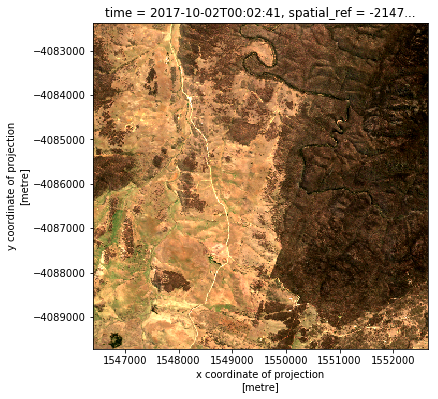

In [1]:
%matplotlib inline

import numpy as np
import xarray as xr
from matplotlib import pyplot as plt

ds = xr.open_dataset("data/nimmitabel2017.nc")
ds = ds.isel(time=0)
swir_3 = ds.nbart_swir_3.values/10000
nir_1 = ds.nbart_nir_1.values/10000

ds[['nbart_red', 'nbart_green', 'nbart_blue']].to_array().plot.imshow(robust=True, figsize=(6,6))

#### We are going to plot the histograms for different bands that show how reflectances are distributed in this image. For example,  band 12 in Sentinel 2 is centered around wavelength 2190 nm. From the previous figure we can see how this band should be specially good at differentiating between dry and wet vegetation.

>Note: Band 12 has the name `nbart_swir_3` in the DEA data collection. NBART describes the corrections applied to this image so it can be interpreted for remote sensing applications and SWIR_3 stands for Short Wave Infra-Red 3.

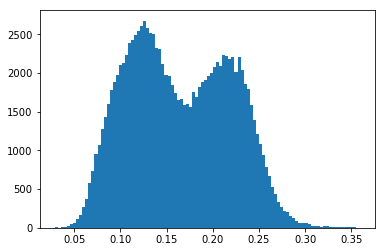

In [2]:
_ = plt.hist(swir_3.flatten(), bins=100)

#### This histogram shows that the values in this band aggregate around two values at around 0.12 and 0.24 reflectance values. The spectral response figure tells us that green vegetation will show lower reflectances than dry vegetation. To verify this we are going to establish a threshold at reflectance=0.18 to separate the pixels in this image in two categories.

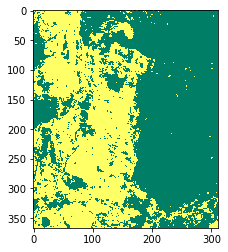

In [3]:
plt.imshow(swir_3>.18, cmap='summer')

#### The pixels with reflectance values above 0.18 will show dark green in the image and the pixels below yellow. This classification makes sense with the visual assessment of the RGB image and is in accordance with the interpretation of the spectral response of vegetation in this band.

#### On the other hand, band 8 situated around 840 nm in Sentinel 2, doesn't seem to provide valuable information for differentiating green and dry vegetation. Let's have a look at the histogram of this band in the image:

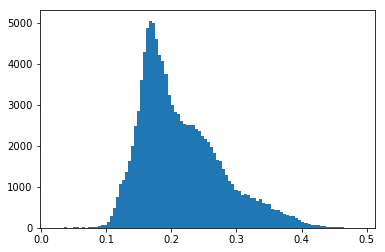

In [4]:
_ = plt.hist(nir_1.flatten(), bins=100)

#### All the pixels concentrate around one value showing a moderate spread around the most common reflectance value. So there is no evidence that thresholding this band at a certain value would allow us to differentiate between vegetation types.

#### In this notebook we have covered some of the basic concepts in remote sensing. The subject can get quite involved with ways of analysing and interpreting multispectral satellite images but hopefully this provides a starting point before we get deeper into specific examples.